# Autosklearn model interpretation

In [1]:
import autosklearn
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import models.basemodel, models.autosklearn
import seaborn as sns
import modules.analysis
from matplotlib.ticker import FormatStrFormatter

In [2]:
alg_names = {
    'adaboost': 'AdaBoost',
    'ard_regression': 'ARD\nregression',
    'decision_tree': 'Decision\ntree',
    'extra_trees': 'Extra\ntrees',
    'gradient_boosting': 'Gradient\nboosting',
    'k_nearest_neighbors': 'k-nearest\nneighbors',
    'liblinear_svr': 'SVR\n(liblinear)',
    'libsvm_svr': 'SVR\n(libsvm)',
    'mlp': 'MLP',
    'random_forest': 'Random\nforest',
    'sgd': 'SGD',
    'gaussian_process': 'Gaussian\nprocess'
}

In [3]:
# loads model paths and exp_ids
reps = list(range(0, 30))
folds = list(range(0, 5))

exp_id = '2022110313584614'

model_lst = []
exp_paths = []
result_df = []
learncurve_df = []

for rep in reps:
    exp_path = os.path.join('experiments', exp_id + '_' + str(rep))
    exp_paths.append(exp_path)
    print(exp_path)
    
    fold_lst = []
    for fold in folds:
        model = models.basemodel.BaseModel.load(os.path.join(exp_path, 'fold_' + str(fold)))
        model_df = pd.DataFrame(model.model.cv_results_)
        model_df['fold'] = fold
        model_df['rep'] = rep
        #fold_lst.append(model)
        result_df.append(model_df)
        
        learncurve = model.model.performance_over_time_
        learncurve['fold'] = fold
        learncurve['rep'] = rep
        learncurve_df.append(learncurve)
        
    #model_lst.append(fold_lst)
    
result_df = pd.concat(result_df)
learncurve_df = pd.concat(learncurve_df)
result_df

experiments/2022110313584614_0
experiments/2022110313584614_1
experiments/2022110313584614_2
experiments/2022110313584614_3
experiments/2022110313584614_4
experiments/2022110313584614_5
experiments/2022110313584614_6
experiments/2022110313584614_7
experiments/2022110313584614_8
experiments/2022110313584614_9
experiments/2022110313584614_10
experiments/2022110313584614_11
experiments/2022110313584614_12
experiments/2022110313584614_13
experiments/2022110313584614_14
experiments/2022110313584614_15
experiments/2022110313584614_16
experiments/2022110313584614_17
experiments/2022110313584614_18
experiments/2022110313584614_19
experiments/2022110313584614_20
experiments/2022110313584614_21
experiments/2022110313584614_22
experiments/2022110313584614_23
experiments/2022110313584614_24
experiments/2022110313584614_25
experiments/2022110313584614_26
experiments/2022110313584614_27
experiments/2022110313584614_28
experiments/2022110313584614_29


,mean_test_score,rank_test_scores,mean_fit_time,params,status,budgets,param_data_preprocessor:__choice__,param_feature_preprocessor:__choice__,param_regressor:__choice__,param_data_preprocessor:feature_type:numerical_transformer:imputation:strategy,...,param_regressor:libsvm_svr:coef0,param_regressor:libsvm_svr:degree,param_regressor:libsvm_svr:gamma,param_regressor:mlp:validation_fraction,param_regressor:sgd:epsilon,param_regressor:sgd:eta0,param_regressor:sgd:l1_ratio,param_regressor:sgd:power_t,fold,rep
0,2.147484e+09,128,249.215221,{'data_preprocessor:__choice__': 'feature_type...,Memout,0.0,feature_type,no_preprocessing,random_forest,mean,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,2.147484e+09,128,17.933057,{'data_preprocessor:__choice__': 'feature_type...,Memout,0.0,feature_type,polynomial,ard_regression,mean,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,2.147484e+09,128,899.069112,{'data_preprocessor:__choice__': 'feature_type...,Timeout,0.0,feature_type,polynomial,gradient_boosting,mean,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,5.152081e+00,68,360.894450,{'data_preprocessor:__choice__': 'feature_type...,Success,0.0,feature_type,extra_trees_preproc_for_regression,gradient_boosting,median,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,4.677715e+00,48,174.203716,{'data_preprocessor:__choice__': 'feature_type...,Success,0.0,feature_type,polynomial,mlp,median,...,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,2.147484e+09,129,68.086353,{'data_preprocessor:__choice__': 'feature_type...,Timeout,0.0,feature_type,extra_trees_preproc_for_regression,random_forest,median,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,29
187,2.147484e+09,129,38.119853,{'data_preprocessor:__choice__': 'feature_type...,Timeout,0.0,feature_type,no_preprocessing,extra_trees,most_frequent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,29
188,2.147484e+09,129,3.893251,{'data_preprocessor:__choice__': 'feature_type...,Memout,0.0,feature_type,feature_agglomeration,gaussian_process,most_frequent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,29
189,2.147484e+09,129,21.067454,{'data_preprocessor:__choice__': 'feature_type...,Timeout,0.0,feature_type,select_percentile_regression,adaboost,mean,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,29


### Basic Run Statistics

status                      Crash  Memout  Success  Timeout
param_regressor:__choice__                                 
AdaBoost                     12.0     1.0   1471.0    265.0
ARD\nregression               9.0   223.0   2362.0     71.0
Decision\ntree                6.0     NaN   1360.0     88.0
Extra\ntrees                 29.0    73.0   2418.0   1879.0
Gaussian\nprocess             8.0  1124.0      NaN      5.0
Gradient\nboosting           24.0   142.0   3464.0    329.0
k-nearest\nneighbors          9.0   996.0    268.0      8.0
SVR\n(liblinear)             59.0   120.0   1702.0     65.0
SVR\n(libsvm)                10.0     NaN   1021.0   1070.0
MLP                           4.0     1.0   1500.0     77.0
Random\nforest               11.0   284.0    990.0   1209.0
SGD                           7.0   147.0   1469.0     68.0


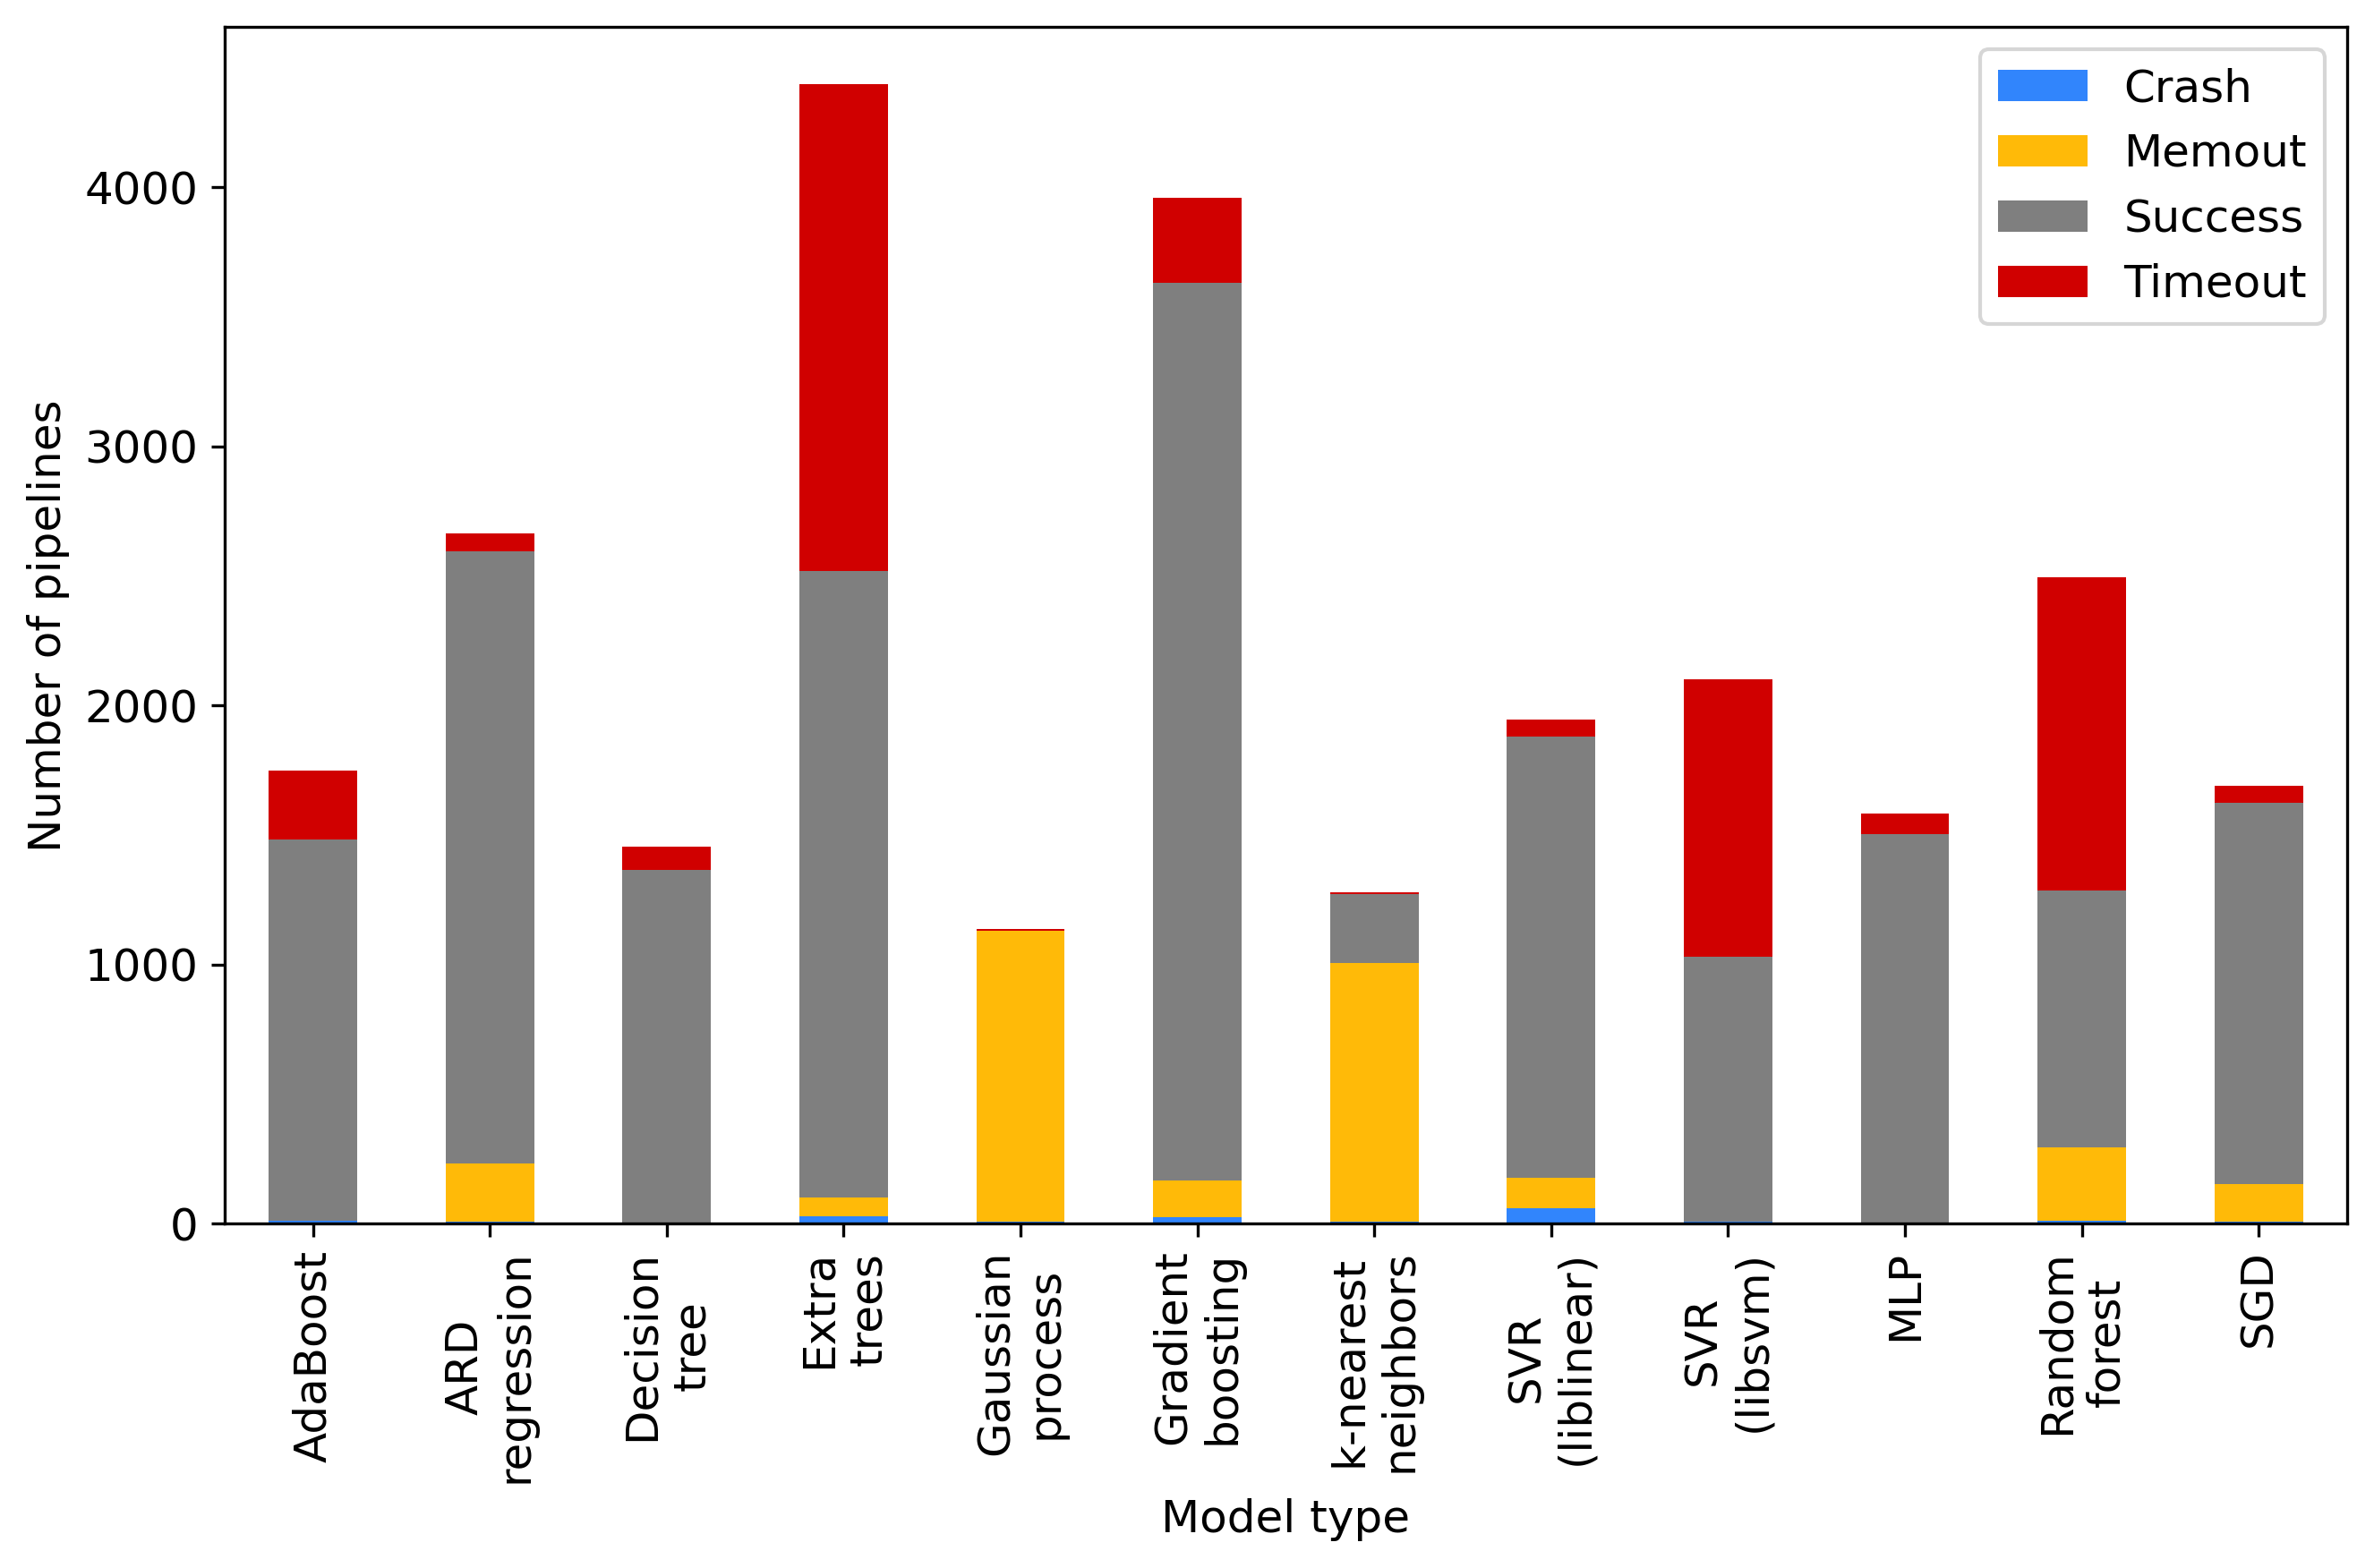

In [4]:
# Success / timeout / memout/ crash
result_df['status'].value_counts()

# which models have crashed?
run_stats = result_df.groupby('param_regressor:__choice__')['status'].value_counts().unstack('status')
run_stats = run_stats.rename(index=alg_names)
colors = plt.cm.Paired(np.linspace(0, 1, 6))
print(run_stats)
run_stats.plot(kind='bar', stacked=True)
plt.legend(ncol=1, title='')
#plt.ylim(0, 1)
plt.xlabel('Model type')
plt.ylabel('Number of pipelines')
plt.tight_layout()
plt.savefig(os.path.join('analysis/benchmark', exp_id, 'base_model_runstat.pdf'))

### What type of algorithm performs best?

In [5]:
result_df = result_df.reset_index(drop=True)
maxalg_idx = result_df[result_df.status == 'Success'].groupby(['rep', 'fold', 'param_regressor:__choice__'])['mean_test_score'].idxmin()
maxalg_df = result_df.loc[maxalg_idx]
# min max scale
maxalg_df['mean_test_score'] = maxalg_df.groupby(['rep', 'fold'])['mean_test_score'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
maxalg_df

,mean_test_score,rank_test_scores,mean_fit_time,params,status,budgets,param_data_preprocessor:__choice__,param_feature_preprocessor:__choice__,param_regressor:__choice__,param_data_preprocessor:feature_type:numerical_transformer:imputation:strategy,...,param_regressor:libsvm_svr:coef0,param_regressor:libsvm_svr:degree,param_regressor:libsvm_svr:gamma,param_regressor:mlp:validation_fraction,param_regressor:sgd:epsilon,param_regressor:sgd:eta0,param_regressor:sgd:l1_ratio,param_regressor:sgd:power_t,fold,rep
67,0.058618,34,40.192071,{'data_preprocessor:__choice__': 'feature_type...,Success,0.0,feature_type,select_percentile_regression,adaboost,mean,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
156,0.037892,21,5.051122,{'data_preprocessor:__choice__': 'feature_type...,Success,0.0,feature_type,feature_agglomeration,ard_regression,most_frequent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
97,0.324849,75,78.169095,{'data_preprocessor:__choice__': 'feature_type...,Success,0.0,feature_type,no_preprocessing,decision_tree,most_frequent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
80,0.000000,1,40.176489,{'data_preprocessor:__choice__': 'feature_type...,Success,0.0,feature_type,feature_agglomeration,extra_trees,most_frequent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
6,0.074659,37,20.009405,{'data_preprocessor:__choice__': 'feature_type...,Success,0.0,feature_type,no_preprocessing,gradient_boosting,mean,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26296,0.137825,47,15.403729,{'data_preprocessor:__choice__': 'feature_type...,Success,0.0,feature_type,kitchen_sinks,liblinear_svr,most_frequent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,29
26350,0.200202,62,169.680599,{'data_preprocessor:__choice__': 'feature_type...,Success,0.0,feature_type,extra_trees_preproc_for_regression,libsvm_svr,median,...,NaN,NaN,0.00009,NaN,NaN,NaN,NaN,NaN,4,29
26286,0.070554,36,214.875745,{'data_preprocessor:__choice__': 'feature_type...,Success,0.0,feature_type,extra_trees_preproc_for_regression,mlp,mean,...,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,4,29
26426,0.004688,3,86.500989,{'data_preprocessor:__choice__': 'feature_type...,Success,0.0,feature_type,no_preprocessing,random_forest,most_frequent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,29


adaboost
0.035522006808996205
0.34408323702564014
ard_regression
0.10146637913392023
0.29756902226038306
decision_tree
0.3635515492783828
0.8907576731311735
extra_trees
0.0
0.014212143739267274
gradient_boosting
0.017151495249014
0.13860975405918155
k_nearest_neighbors
0.2187307738460569
1.0
liblinear_svr
0.09766634449188835
0.390615014781052
libsvm_svr
0.19347336359627348
0.6427887566873522
mlp
0.07472378455215463
0.2451479005155674
random_forest
0.005810381216068796
0.3161064083076178
sgd
0.1691143766333295
0.7526407226718416


/tmp/ipykernel_192/2644789562.py:74: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


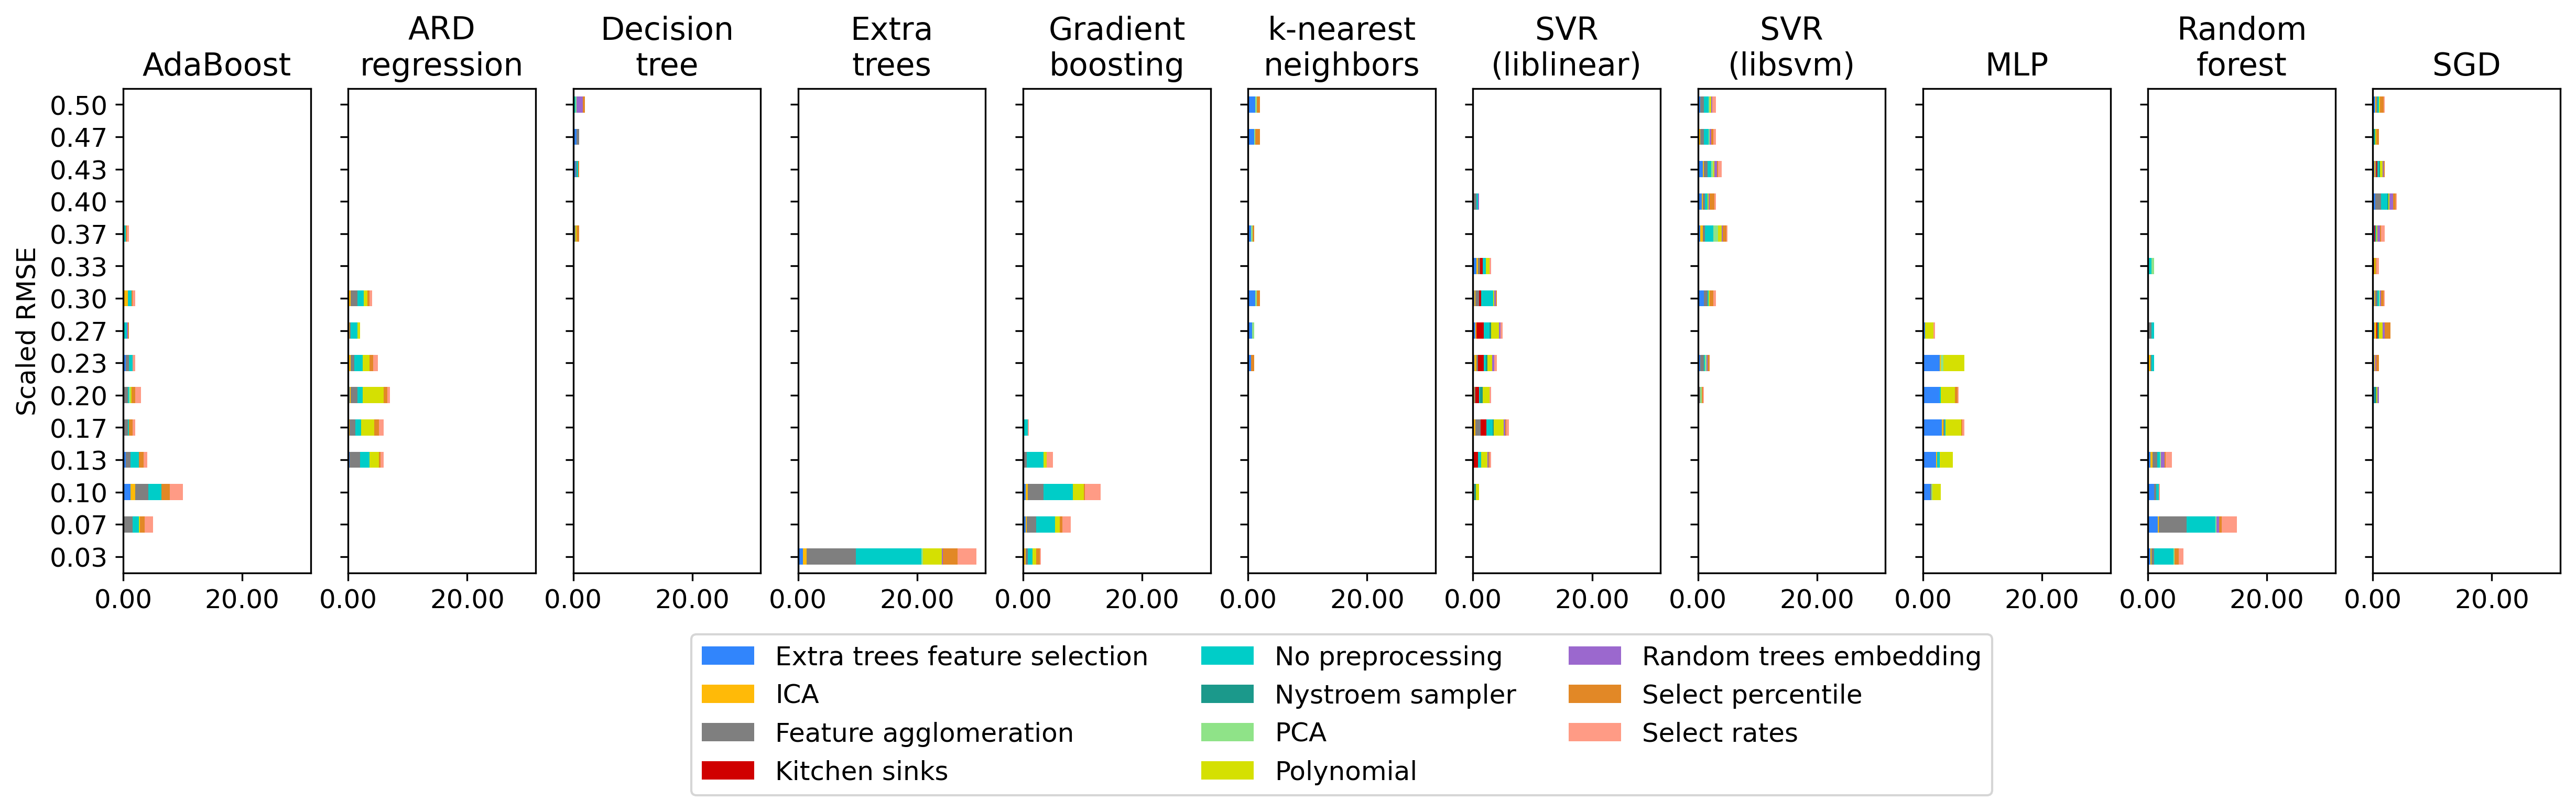

In [131]:
max_score = maxalg_df.groupby(['rep', 'param_regressor:__choice__'])['mean_test_score'].mean()

# number of each preproc algorithm used for regressor
preproc_choice = maxalg_df.groupby(['rep', 'param_regressor:__choice__', 'param_feature_preprocessor:__choice__']).size().unstack(fill_value=0)
preproc_choice = preproc_choice.rename(columns={'extra_trees_preproc_for_regression': 'Extra trees feature selection', 
                                                'fast_ica': 'ICA', 
                                                'feature_agglomeration': 'Feature agglomeration', 
                                                'kitchen_sinks': 'Kitchen sinks', 
                                                'no_preprocessing': 'No preprocessing',
                                                'nystroem_sampler': 'Nystroem sampler', 
                                                'pca': 'PCA', 
                                                'polynomial': 'Polynomial', 
                                                'random_trees_embedding': 'Random trees embedding',
                                                'select_percentile_regression': 'Select percentile', 
                                                'select_rates_regression': 'Select rates'
                                               })

algs = max_score.index.get_level_values(1).unique()

fig, ax = plt.subplots(1, len(algs), figsize=(20, 4), sharey=True, sharex=True)
hist_max = .5#5.5 #max_score_select.max()
hist_min = 0#3.9 #max_score_select.min()
n_bins = 15
binwidth = np.abs(hist_max - hist_min) / n_bins

for idx, alg in enumerate(algs):
    ax[idx].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    # select algorithm specific score and preprocessing steps
    max_score_select = max_score.loc[(slice(None), alg)]
    preproc_choice_select = preproc_choice.loc[(slice(None), alg), :]
    
    print(alg)
    print(max_score_select.min())
    print(max_score_select.max())

    # calc histogram for the repetitions (1-30). Digitize returns 0 for everythin below first edge
    counts, edges = np.histogram(max_score_select, bins=n_bins, range=(hist_min, hist_max))
    bin_indices = np.digitize(max_score_select.values, edges)
    bin_indices = np.array(bin_indices) - 1
    bin_centers = pd.Series(edges[:-1] + binwidth, index=list(range(0, n_bins)), name='bins')
    
    # df with mean score per bin number
    preproc_choice_select_mean = preproc_choice_select.groupby(bin_indices).sum()
    preproc_choice_select_mean = preproc_choice_select_mean.divide(preproc_choice_select_mean.sum(axis=1), axis=0)
    preproc_choice_select_mean = preproc_choice_select_mean[(preproc_choice_select_mean.index.get_level_values(0) >= 0) & (preproc_choice_select_mean.index.get_level_values(0) < n_bins)]
    
    # df with bin centers as index
    preproc_choice_select_mean = pd.concat([preproc_choice_select_mean, bin_centers], axis=1).set_index('bins').sort_index()
    preproc_choice_select_mean.multiply(counts, axis=0).plot.barh(stacked=True, ax=ax[idx], legend=False)
    ax[idx].set_title(alg_names[alg])
    yticklabels = ['{:.2f}'.format(bc) for bc in preproc_choice_select_mean.index.values]
    #ax.set_yticks(bin_centers)
    ax[idx].set_yticklabels(yticklabels)

handles, labels = ax[idx].get_legend_handles_labels()

ax[0].set_ylabel('Scaled RMSE')
ax[5].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncols=3)
plt.tight_layout() 
plt.savefig(os.path.join('analysis/benchmark', exp_id, 'base_model_perform.pdf'))

### Learning curve

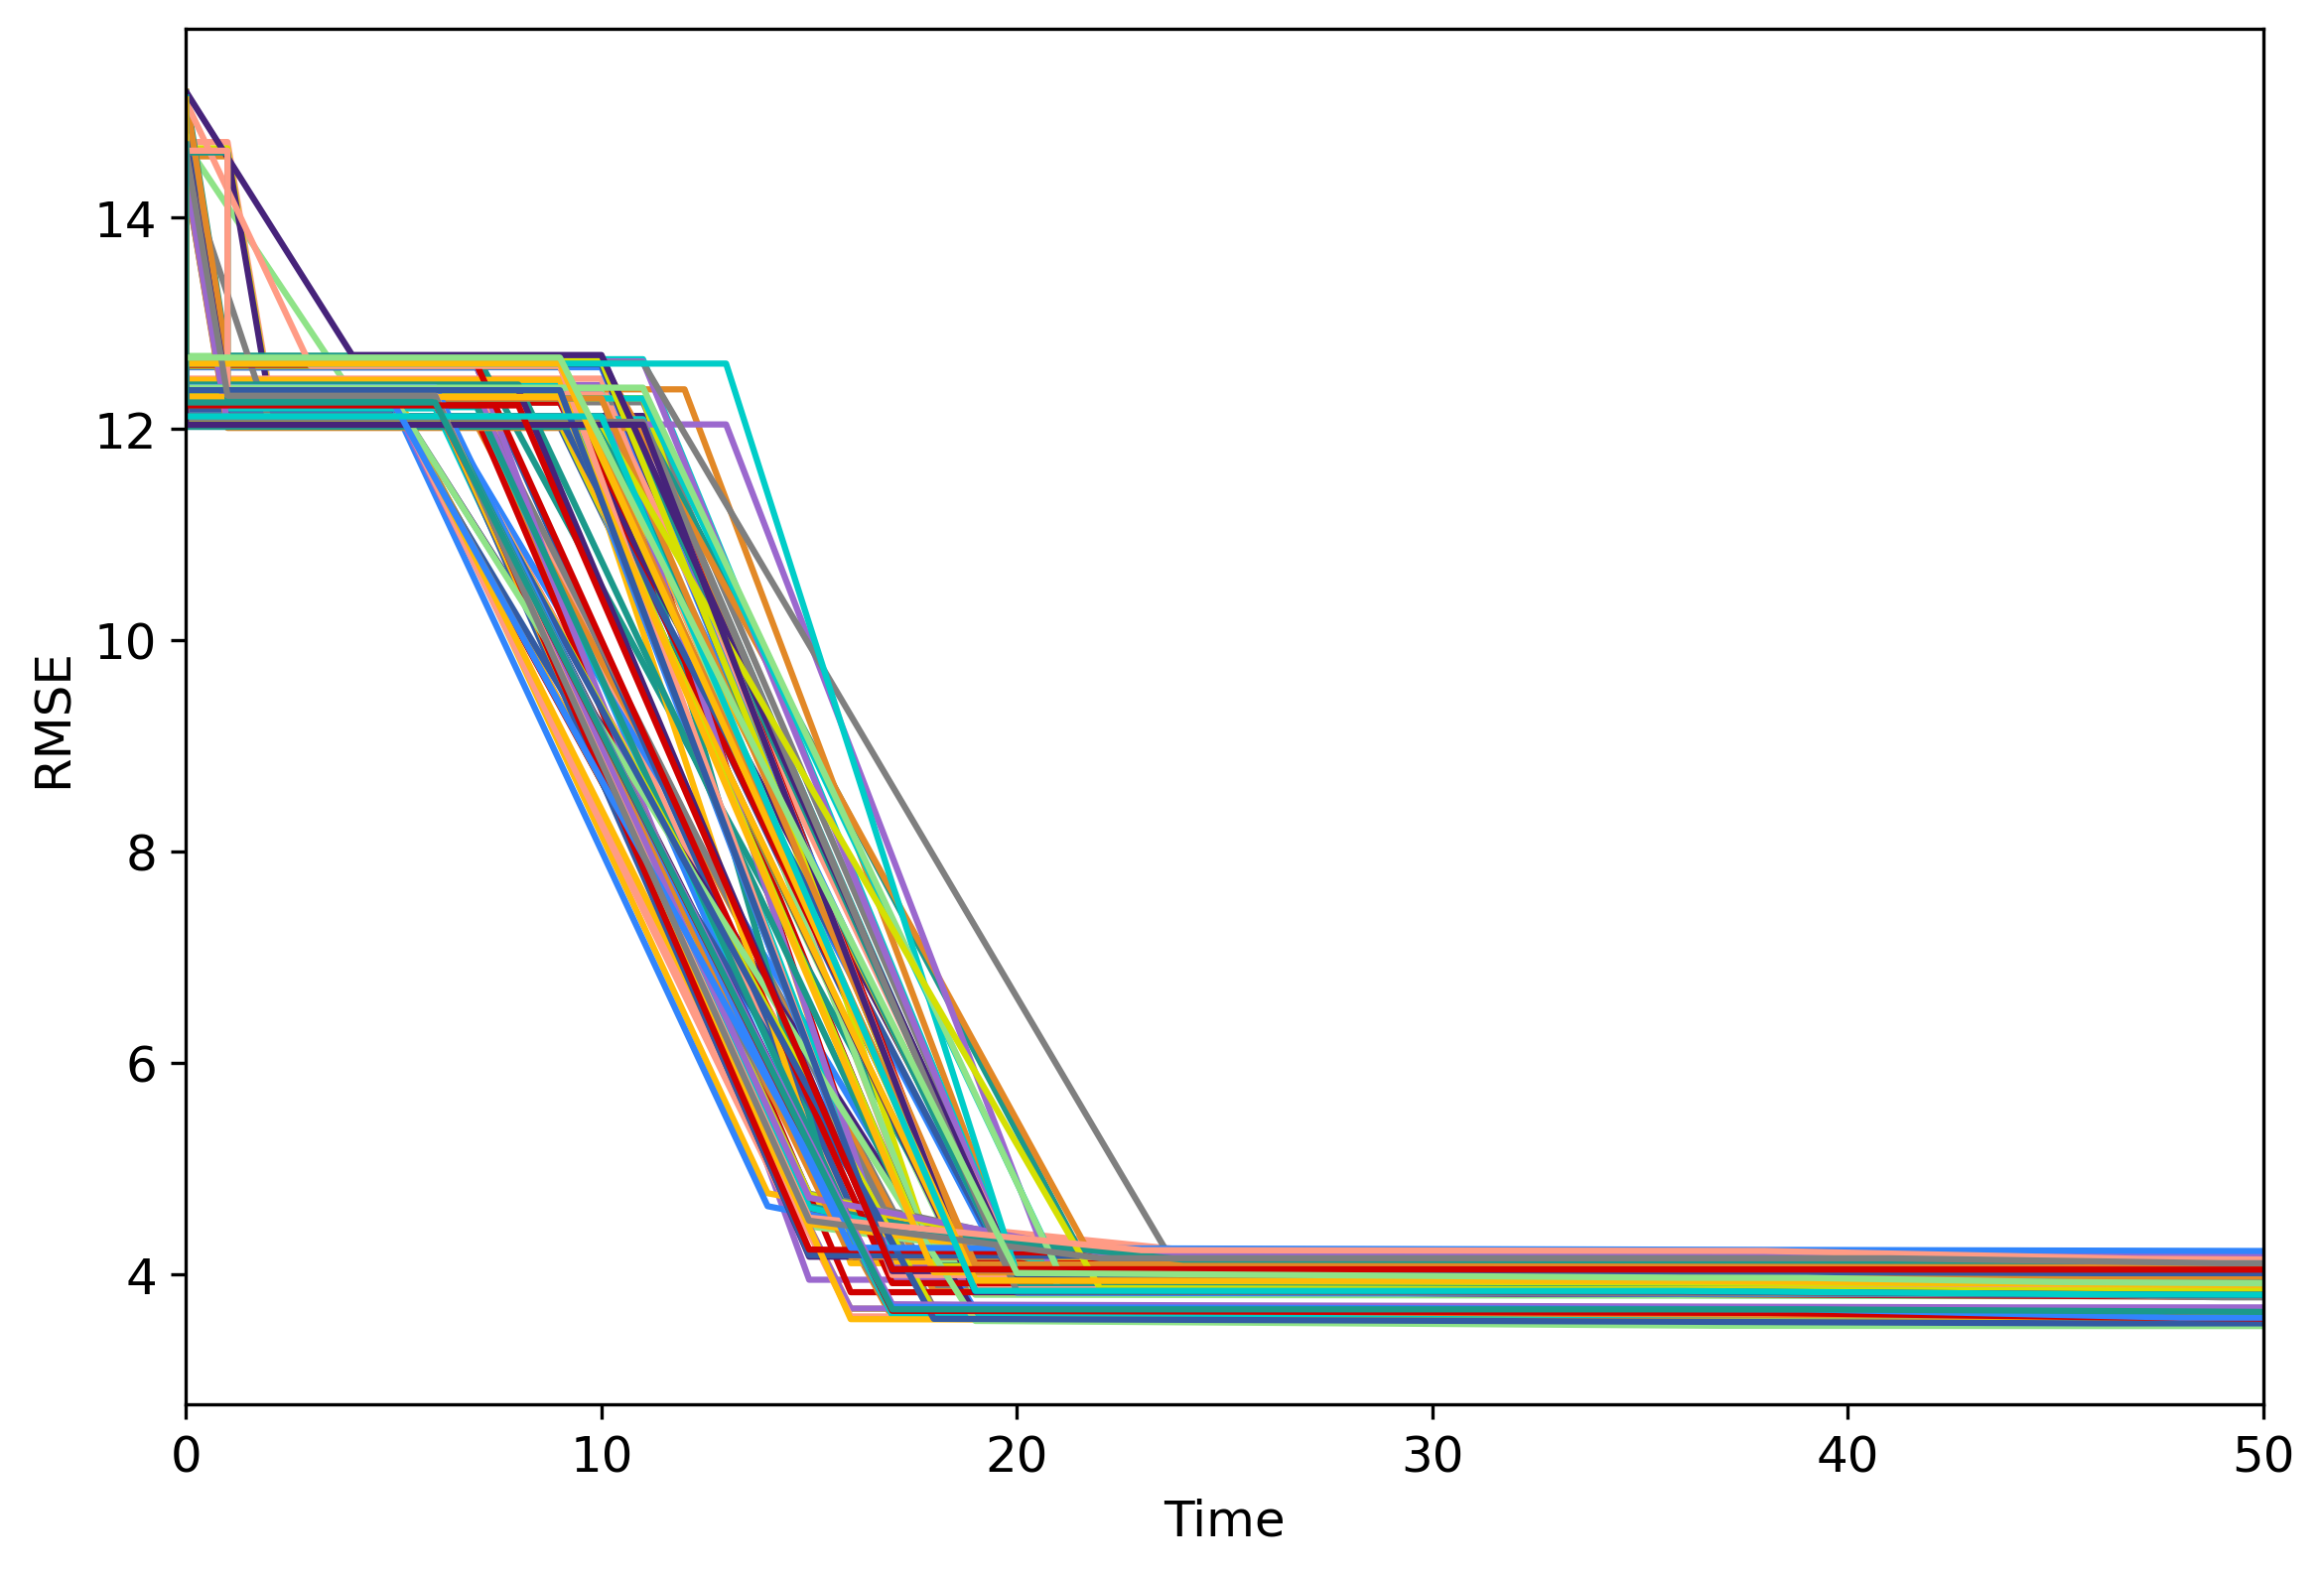

In [15]:
# learning curve
starttime = learncurve_df.groupby(['fold', 'rep'])['Timestamp'].transform('min')
learncurve_df_plt = learncurve_df.copy()
learncurve_df_plt['time_since_start'] = learncurve_df_plt['Timestamp'] - starttime
learncurve_df_plt['ensemble_optimization_score'] = learncurve_df_plt['ensemble_optimization_score'] * (-1)

fig, ax = plt.subplots()
for label, df in learncurve_df_plt.set_index('time_since_start').groupby(['rep', 'fold'])['ensemble_optimization_score']:
    ax.plot(df.index.seconds, df.values, label=label)
ax.set_ylabel('RMSE')
ax.set_xlabel('Time [s]')
ax.set_xlim(0, 50)
plt.show()

### Ensemble choice

In [17]:
model_x = models.basemodel.BaseModel.load(os.path.join(exp_path, 'fold_0'))
model_x.model.get_models_with_weights()

[(0.2,
  SimpleRegressionPipeline({'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'polynomial', 'regressor:__choice__': 'gradient_boosting', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:polynomial:degree': 2, 'feature_preprocessor:polynomial:include_bias': 'True', 'feature_preprocessor:polynomial:interaction_only': 'False', 'regressor:gradient_boosting:early_stop': 'train', 'regressor:gradient_boosting:l2_regularization': 1.3053128884667706e-10, 'regressor:gradient_boosting:learning_rate': 0.05594167483605857, 'regressor:gradient_boosting:loss': 'least_squares', 'regressor:gradient_boosting:max_bins': 255, 'regressor:gradient_boosting:max_depth': 'None', 'regressor:gradient_boosting:max_leaf_nodes': 85, 'regressor:gradient_boosting:min_samples_leaf': 10, 'regressor:gradient_boosting:scoring': 'loss